In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from io import StringIO
from matplotlib_venn import venn2

color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [10]:
df_train = pd.read_csv("../input/train.csv", parse_dates=["activation_date"])
df_test = pd.read_csv("../input/test.csv", parse_dates=["activation_date"])

In [11]:
df_train.head(4)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

In [13]:
gc.collect()

1327

In [8]:
os.listdir('../input/')

['test_jpg.zip',
 'train_jpg.zip',
 'periods_train.csv',
 'train.csv',
 'sample_submission.csv',
 'train_active.csv',
 'test.csv',
 'periods_test.csv',
 'test_active.csv']

In [23]:
temp_data = StringIO("""
region,region_en
Свердловская область, Sverdlovsk oblast
Самарская область, Samara oblast
Ростовская область, Rostov oblast
Татарстан, Tatarstan
Волгоградская область, Volgograd oblast
Нижегородская область, Nizhny Novgorod oblast
Пермский край, Perm Krai
Оренбургская область, Orenburg oblast
Ханты-Мансийский АО, Khanty-Mansi Autonomous Okrug
Тюменская область, Tyumen oblast
Башкортостан, Bashkortostan
Краснодарский край, Krasnodar Krai
Новосибирская область, Novosibirsk oblast
Омская область, Omsk oblast
Белгородская область, Belgorod oblast
Челябинская область, Chelyabinsk oblast
Воронежская область, Voronezh oblast
Кемеровская область, Kemerovo oblast
Саратовская область, Saratov oblast
Владимирская область, Vladimir oblast
Калининградская область, Kaliningrad oblast
Красноярский край, Krasnoyarsk Krai
Ярославская область, Yaroslavl oblast
Удмуртия, Udmurtia
Алтайский край, Altai Krai
Иркутская область, Irkutsk oblast
Ставропольский край, Stavropol Krai
Тульская область, Tula oblast
""")

In [9]:
del df_train

In [28]:
pd.unique(df_train['region'])

array(['Свердловская область', 'Самарская область', 'Ростовская область', 'Татарстан',
       'Волгоградская область', 'Нижегородская область', 'Пермский край', 'Оренбургская область',
       'Ханты-Мансийский АО', 'Тюменская область', 'Башкортостан', 'Краснодарский край',
       'Новосибирская область', 'Омская область', 'Белгородская область', 'Челябинская область',
       'Воронежская область', 'Кемеровская область', 'Саратовская область', 'Владимирская область',
       'Калининградская область', 'Красноярский край', 'Ярославская область', 'Удмуртия', 'Алтайский край',
       'Иркутская область', 'Ставропольский край', 'Тульская область'], dtype=object)

In [29]:
df_train = pd.merge(df_train, pd.read_csv(temp_data), how='left', on='region')

In [33]:
pd.unique(df_train['region_en'])

array([' Sverdlovsk oblast', ' Samara oblast', ' Rostov oblast', ' Tatarstan', ' Volgograd oblast',
       ' Nizhny Novgorod oblast', ' Perm Krai', ' Orenburg oblast', ' Khanty-Mansi Autonomous Okrug',
       ' Tyumen oblast', ' Bashkortostan', ' Krasnodar Krai', ' Novosibirsk oblast', ' Omsk oblast',
       ' Belgorod oblast', ' Chelyabinsk oblast', ' Voronezh oblast', ' Kemerovo oblast', ' Saratov oblast',
       ' Vladimir oblast', ' Kaliningrad oblast', ' Krasnoyarsk Krai', ' Yaroslavl oblast', ' Udmurtia',
       ' Altai Krai', ' Irkutsk oblast', ' Stavropol Krai', ' Tula oblast'], dtype=object)

In [34]:
del df_train['region']

In [74]:
df_train.groupby('region_en')['deal_probability'].mean()

region_en
 Altai Krai                       0.136257
 Bashkortostan                    0.148859
 Belgorod oblast                  0.145603
 Chelyabinsk oblast               0.143229
 Irkutsk oblast                   0.139679
 Kaliningrad oblast               0.131574
 Kemerovo oblast                  0.135480
 Khanty-Mansi Autonomous Okrug    0.143696
 Krasnodar Krai                   0.147066
 Krasnoyarsk Krai                 0.120357
 Nizhny Novgorod oblast           0.146608
 Novosibirsk oblast               0.124689
 Omsk oblast                      0.129185
 Orenburg oblast                  0.155921
 Perm Krai                        0.143685
 Rostov oblast                    0.135944
 Samara oblast                    0.136721
 Saratov oblast                   0.145991
 Stavropol Krai                   0.153586
 Sverdlovsk oblast                0.122004
 Tatarstan                        0.142602
 Tula oblast                      0.143882
 Tyumen oblast                    0.124193
 

In [35]:
df_train.columns

Index(['item_id', 'user_id', 'city', 'parent_category_name', 'category_name',
       'param_1', 'param_2', 'param_3', 'title', 'description', 'price',
       'item_seq_number', 'activation_date', 'user_type', 'image',
       'image_top_1', 'deal_probability', 'region_en'],
      dtype='object')

In [58]:
temp_data = StringIO("""
parent_category_name,parent_category_name_en
Личные вещи,Personal belongings
Для дома и дачи,For the home and garden
Бытовая электроника,Consumer electronics
Недвижимость,Real estate
Хобби и отдых,Hobbies & leisure
Транспорт,Transport
Услуги,Services
Животные,Animals
Для бизнеса,For business
""")

df_train = pd.merge(df_train, pd.read_csv(temp_data), on="parent_category_name", how="left")
del df_train['parent_category_name']

In [63]:
df_train['parent_category_name_en'].value_counts()/df_train.shape[0]

Personal belongings        0.464023
For the home and garden    0.118944
Consumer electronics       0.115076
Real estate                0.101894
Hobbies & leisure          0.057210
Transport                  0.053105
Services                   0.042826
Animals                    0.034900
For business               0.012023
Name: parent_category_name_en, dtype: float64

In [70]:
df_train.groupby('parent_category_name_en')['deal_probability'].mean()

parent_category_name_en
Animals                    0.235957
Consumer electronics       0.175421
For business               0.111026
For the home and garden    0.179633
Hobbies & leisure          0.123703
Personal belongings        0.075876
Real estate                0.142051
Services                   0.403123
Transport                  0.263336
Name: deal_probability, dtype: float64

In [76]:
temp_data = StringIO("""
category_name,category_name_en
"Одежда, обувь, аксессуары","Clothing, shoes, accessories"
Детская одежда и обувь,Children's clothing and shoes
Товары для детей и игрушки,Children's products and toys
Квартиры,Apartments
Телефоны,Phones
Мебель и интерьер,Furniture and interior
Предложение услуг,Offer services
Автомобили,Cars
Ремонт и строительство,Repair and construction
Бытовая техника,Appliances
Товары для компьютера,Products for computer
"Дома, дачи, коттеджи","Houses, villas, cottages"
Красота и здоровье,Health and beauty
Аудио и видео,Audio and video
Спорт и отдых,Sports and recreation
Коллекционирование,Collecting
Оборудование для бизнеса,Equipment for business
Земельные участки,Land
Часы и украшения,Watches and jewelry
Книги и журналы,Books and magazines
Собаки,Dogs
"Игры, приставки и программы","Games, consoles and software"
Другие животные,Other animals
Велосипеды,Bikes
Ноутбуки,Laptops
Кошки,Cats
Грузовики и спецтехника,Trucks and buses
Посуда и товары для кухни,Tableware and goods for kitchen
Растения,Plants
Планшеты и электронные книги,Tablets and e-books
Товары для животных,Pet products
Комнаты,Room
Фототехника,Photo
Коммерческая недвижимость,Commercial property
Гаражи и машиноместа,Garages and Parking spaces
Музыкальные инструменты,Musical instruments
Оргтехника и расходники,Office equipment and consumables
Птицы,Birds
Продукты питания,Food
Мотоциклы и мототехника,Motorcycles and bikes
Настольные компьютеры,Desktop computers
Аквариум,Aquarium
Охота и рыбалка,Hunting and fishing
Билеты и путешествия,Tickets and travel
Водный транспорт,Water transport
Готовый бизнес,Ready business
Недвижимость за рубежом,Property abroad
""")

df_train = pd.merge(df_train, pd.read_csv(temp_data), on="category_name", how="left")
del df_train['category_name']

In [81]:
df_train['category_name_en'].value_counts()

Clothing, shoes, accessories        282753
Children's clothing and shoes       270359
Children's products and toys         99747
Apartments                           83670
Phones                               65944
Furniture and interior               65035
Offer services                       64385
Cars                                 62494
Repair and construction              56201
Appliances                           33705
Products for computer                29565
Houses, villas, cottages             29244
Health and beauty                    29198
Audio and video                      27036
Sports and recreation                24881
Equipment for business               16047
Land                                 16038
Watches and jewelry                  15566
Books and magazines                  11819
Dogs                                 11612
Games, consoles and software         11167
Other animals                        11040
Bikes                                10638
Laptops    

In [77]:
df_train.groupby('category_name_en')['deal_probability'].mean()

category_name_en
Apartments                          0.158154
Appliances                          0.252776
Aquarium                            0.183616
Audio and video                     0.171572
Bikes                               0.247573
Birds                               0.238340
Books and magazines                 0.040673
Cars                                0.278427
Cats                                0.297259
Children's clothing and shoes       0.060834
Children's products and toys        0.198445
Clothing, shoes, accessories        0.046447
Commercial property                 0.121215
Desktop computers                   0.180099
Dogs                                0.252812
Equipment for business              0.112431
Food                                0.135809
Furniture and interior              0.191848
Games, consoles and software        0.202623
Garages and Parking spaces          0.119438
Health and beauty                   0.092382
Houses, villas, cottages            0.

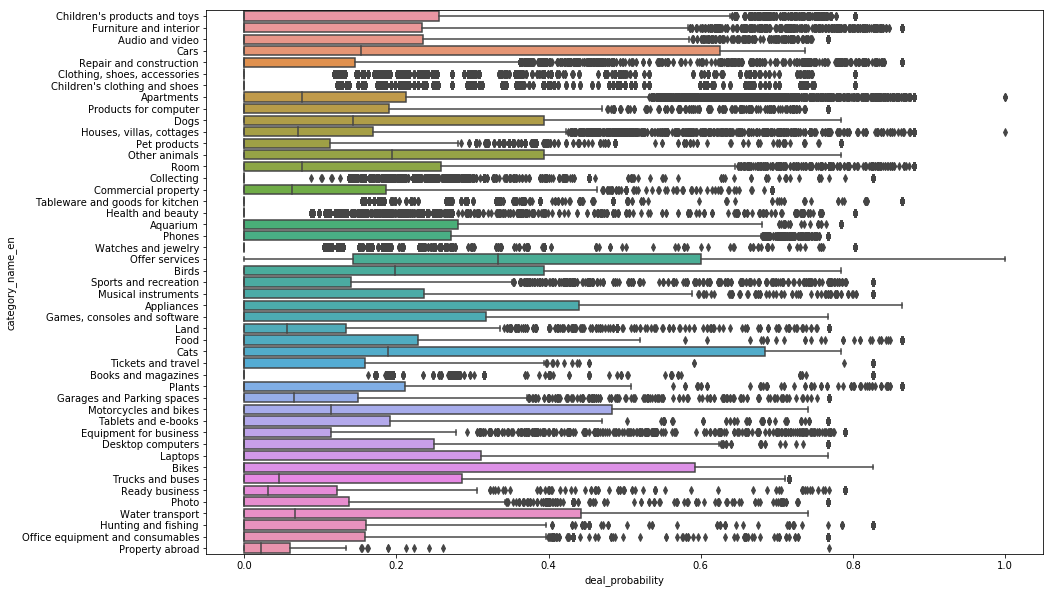

In [80]:
plt.figure(figsize=(15,10))
sns.boxplot(x='deal_probability', y='category_name_en', data=df_train)

In [88]:
pd.qcut(df_train['price'], 4).value_counts().sort_index()

(-0.001, 500.0]            453987
(500.0, 1300.0]            260787
(1300.0, 7000.0]           354401
(7000.0, 79501011850.0]    348887
Name: price, dtype: int64

In [90]:
cnt_srs = df_train['activation_date'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Activation Dates in Train'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

# Activation dates in test
cnt_srs = df_test['activation_date'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Activation Dates in Test'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

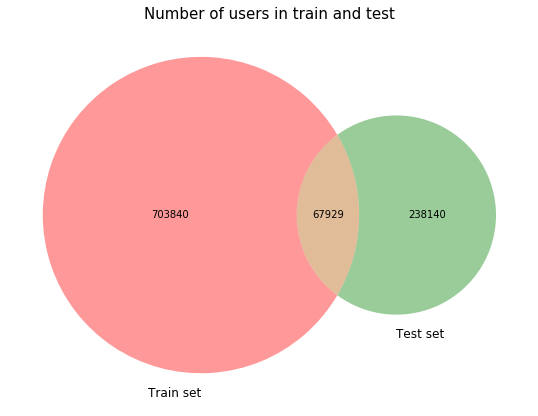

In [92]:
plt.figure(figsize=(10,7))
venn2([set(df_train.user_id.unique()), set(df_test.user_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Number of users in train and test", fontsize=15)
plt.show()

In [93]:
gc.collect()

12278

In [122]:
unique_train = set()
df_train['title'].str.lower().str.split().apply(unique_train.update)
len(unique_train)

352770

In [121]:
unique_desc = set()
df_train['description'].astype(str).str.lower().str.split().apply(unique_desc.update)
len(unique_desc)

2189914

In [125]:
del unique_desc 
del unique_train

In [127]:
gc.collect()

0

In [137]:
df_train['image_top_bin'] = pd.cut(df_train['image_top_1'], 30)

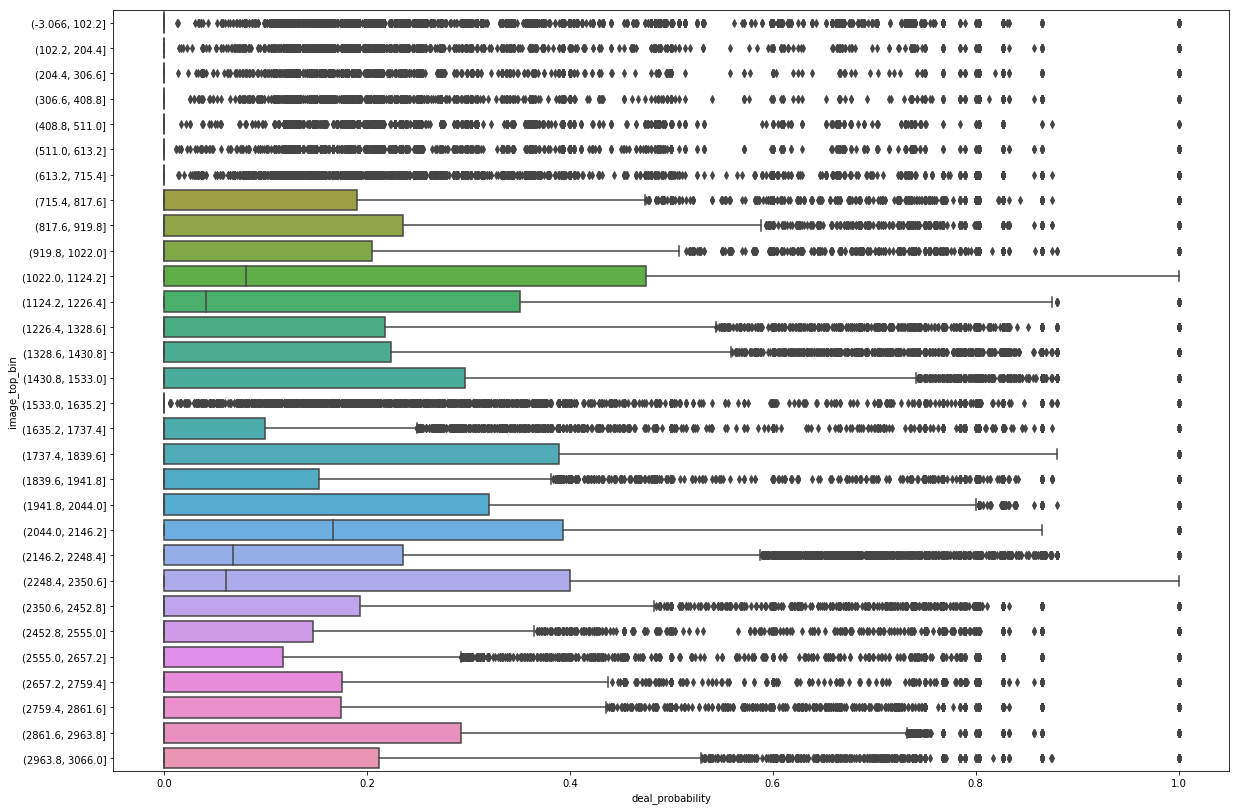

In [139]:
plt.figure(figsize=(20,14))
sns.boxplot(x='deal_probability', y='image_top_bin', data=df_train)

In [150]:
df_train[['deal_probability', 'item_id']].head()

,deal_probability,item_id
0,0.12789,b912c3c6a6ad
1,0.00000,2dac0150717d
2,0.43177,ba83aefab5dc
3,0.80323,02996f1dd2ea
4,0.20797,7c90be56d2ab


In [158]:
df_temp = df_train.groupby('param_1')[['deal_probability', 'image_top_1']].mean().sort_values(by='deal_probability', ascending=False).reset_index()
df_temp

,param_1,deal_probability,image_top_1
0,Бриар,0.672880,2094.000000
1,Ремонт и обслуживание техники,0.569015,2202.601611
2,Уральский рекс,0.549520,2061.000000
3,"Транспорт, перевозки",0.543942,1358.493927
4,"Сад, благоустройство",0.530081,1501.034653
5,Бельгийский гриффон,0.469515,2158.000000
6,"Няни, сиделки",0.463812,1778.120846
7,Уборка,0.436376,1638.671001
8,Мастер на час,0.436173,1834.024141
9,"Красота, здоровье",0.425060,1641.136518


In [193]:
def temp_new_bin(val):    
    for bin in pd.cut(df_train['image_top_1'], 30).value_counts().index.tolist():
        if val in bin:
            return bin
    return None

In [197]:
df_temp['image_top_1_bin'] = df_temp['image_top_1'].map(lambda x: temp_new_bin(x))

In [203]:
df_temp['image_top_1_bin'] = df_temp['image_top_1_bin'].astype('category')

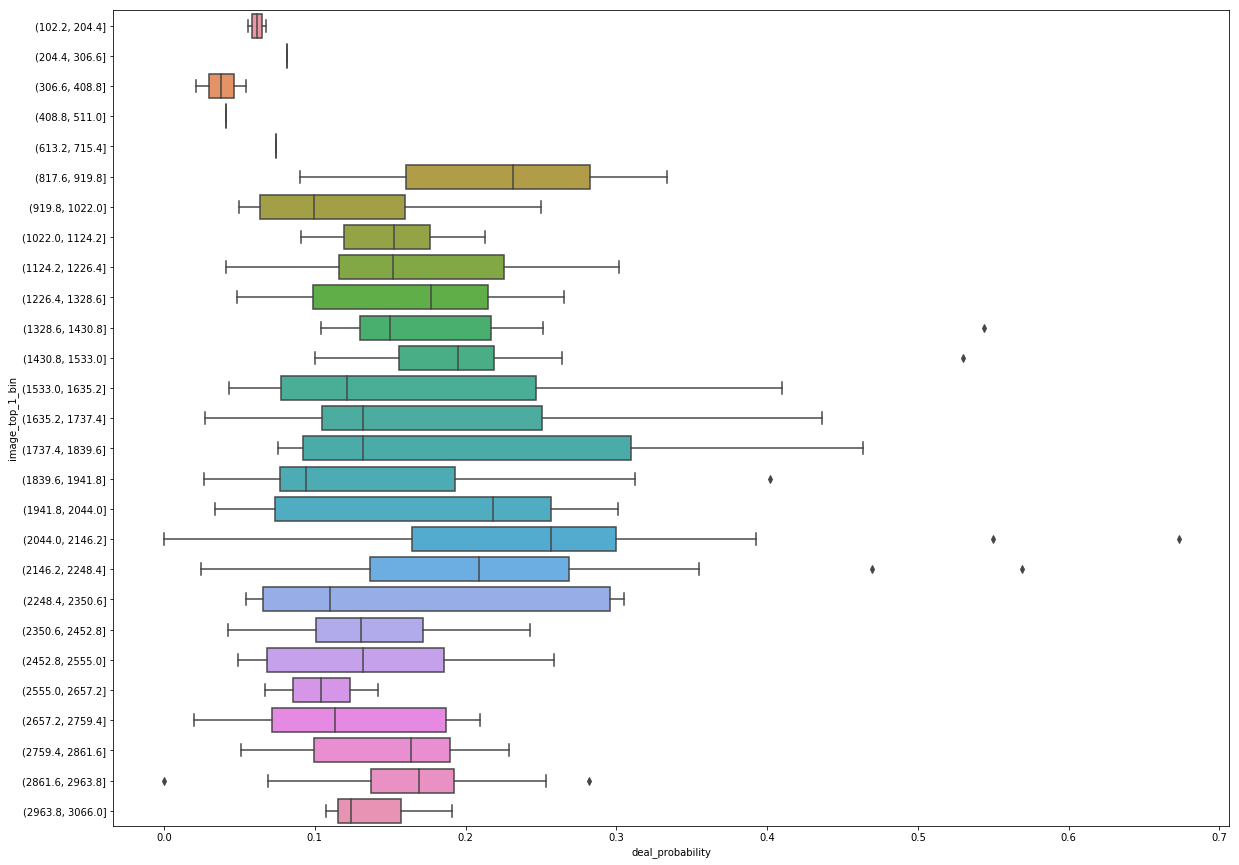

In [204]:
plt.figure(figsize=(20,15))
sns.boxplot(x='deal_probability', y='image_top_1_bin', data = df_temp)